In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score

import statsmodels.api as sm

In [27]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [28]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [29]:
import pickle
X_train= pd.read_pickle('pkls/rand_split/X_train.pkl')
y_train= pd.read_pickle('pkls/rand_split/y_train.pkl')
X_test= pd.read_pickle('pkls/rand_split/X_test.pkl')
y_test= pd.read_pickle('pkls/rand_split/y_test.pkl')

In [30]:
X_test.head().T

,4327,2326,3190,1900,1622
host_is_superhost,True,True,False,True,False
host_identity_verified,False,True,True,False,True
accommodates,1,2,6,8,2
bathrooms,1,1,2.5,2,1
bedrooms,0,1,3,3,1
beds,1,1,3,4,1
bed_type,True,True,True,True,True
cleaning_fee,55,40,150,185,46
guests_included,1,2,1,8,1
room_type_full,0,0,1,1,0


# ALL TRANSFORMATIONS FUNCTIONS  : 

# TRANSFORM ACTIONS based on PKL

In [31]:
listd_insig_cols = ['host_is_superhost','host_identity_verified','bed_type','guests_included','room_type_full',\
                    'room_type_pvt','amentcnt','ppt_condensed_apt','ppt_condensed_aptspl','ppt_condensed_auto',\
                    'ppt_condensed_hotel','ppt_condensed_other',\
                    'zipcode_94014.0', 'zipcode_94015.0', 'zipcode_94102.0',\
                    'zipcode_94103.0', 'zipcode_94104.0', 'zipcode_94105.0',\
                    'zipcode_94107.0', 'zipcode_94108.0', 'zipcode_94109.0',\
                    'zipcode_94110.0', 'zipcode_94111.0', 'zipcode_94112.0',\
                    'zipcode_94114.0', 'zipcode_94115.0', 'zipcode_94116.0',\
                    'zipcode_94117.0', 'zipcode_94118.0', 'zipcode_94121.0',\
                    'zipcode_94122.0', 'zipcode_94123.0', 'zipcode_94124.0',\
                    'zipcode_94127.0', 'zipcode_94129.0', 'zipcode_94131.0',\
                    'zipcode_94132.0', 'zipcode_94133.0', 'zipcode_94134.0','zipcode_94158.0']
# dflreg.head().T

In [32]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

X_train.drop(listd_insig_cols,axis=1,inplace=True)
X_test.drop(listd_insig_cols,axis=1,inplace=True)

In [33]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3729, 10) (933, 10)
(3729,) (933,)


In [52]:
from sklearn.utils import check_array
import numpy as np
def mse_prop(y_true, y_pred): 
    return (np.mean(np.abs((y_true - y_pred)**2 / (y_true+1)**2  )) * 100) **0.5

def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

# OLS Model

In [35]:
import statsmodels.api as sm
import numpy as np
# modelOLS = sm.OLS(y_train, X_train)
modelOLS = sm.OLS(y_train, X_train)
resultsOLS = modelOLS.fit()
print(resultsOLS.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 07 Aug 2018   Prob (F-statistic):          9.06e-205
Time:                        23:13:37   Log-Likelihood:                -25752.
No. Observations:                3729   AIC:                         5.152e+04
Df Residuals:                    3719   BIC:                         5.159e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -15.1342 

In [53]:
y_predOLS = resultsOLS.predict(X_test)
# print(y_predOLS)
print("OLS Model R2 Score for X-test data = ",my_metric(y_test,y_predOLS))

OLS Model R2 Score for X-test data =  0.36679917239049453


# SKLEARN Lin Regression Model

In [37]:
lmodel = linear_model.LinearRegression()
lmodel.fit(X_train,y_train)
y_predsk = lmodel.predict(X_test)

In [38]:
print('Coefficients: \n', lmodel.coef_)

Coefficients: 
 [  0.          27.29803721  54.40483196  44.88412024 -13.34715315
   0.66152974 113.46848822 -43.12579345 -84.1729854  -27.73056203]


In [54]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predsk))
print("Variance squared error: %.2f" % r2_score(y_test, y_predsk))
print("MSE Proportion: %.2f" % mse_prop(y_test, y_predsk))
print("SK LinReg R2 Score for X-test data = ",my_metric(y_test,y_predsk))

Mean squared error: 30187.79
Variance squared error: 0.37
MSE Proportion: 7.04
SK LinReg R2 Score for X-test data =  0.36679917239049864


In [40]:
#Building Residual DF

dfpred= y_test.to_frame()
dfpred['sk_preds'] = y_predsk
dfpred['sk_resid'] = dfpred.sk_preds-dfpred.price
dfpred['sk_residpct'] = (dfpred.sk_preds-dfpred.price)/dfpred.price
# dfpred.head()

Text(0,0.5,'RESIDUAL PCT')

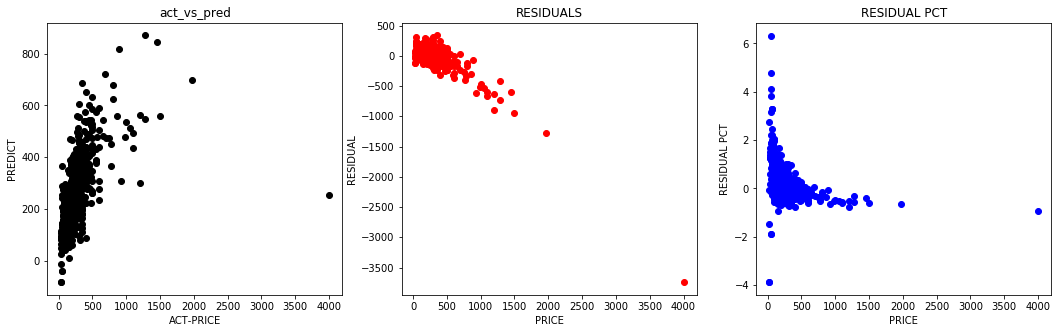

In [41]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(y_test, y_predsk,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('ACT-PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(dfpred.price,dfpred.sk_resid, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(dfpred.price,dfpred.sk_residpct, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

In [42]:
y_predsk

array([ 61.87513814, 124.13434949, 450.77595189, 515.70656012,
        84.97773449, 339.28330729, 173.26794059, 215.24709859,
       260.67457544,  84.94977402, 562.51239829, 249.95917542,
       495.04475742, 113.59608868,  94.23915085, 307.19051667,
       291.64062151, 167.41407502, 153.28787309, 171.99856817,
       249.95917542, 381.85432736, 178.32610113, 141.81560509,
        98.1056847 , 391.84532635, -40.47213265, 127.44199819,
       203.53553526, 102.9653978 , 100.98080858, 697.92495058,
       207.63056542,  97.05784518, 189.67982376, 309.22670454,
       128.71137061, 143.36492699, 181.5073895 , 191.55669593,
        97.05784518, 396.37111993, 130.13433219, 163.2108192 ,
       206.21806727, 354.60250518, 231.26609729,  94.85268375,
       124.85463875, 202.22086841, 311.04418691, 151.86491152,
       114.21140339, 211.53676343, 332.16925353, 110.90375469,
       161.67129928, 342.01751551, 250.18070832,  97.05784518,
       263.18977022, 224.63318294, 141.41381937, 310.23

337.8782095816673


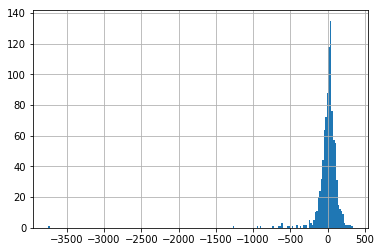

In [43]:
y_resdsk=(y_predsk-y_test)
print(y_resdsk.max())
y_resdsk.hist(bins =200)

619.706333976873


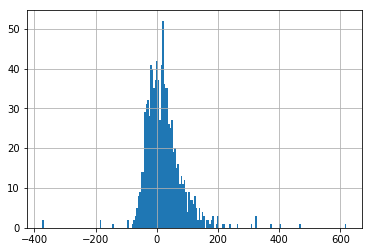

In [44]:
y_resdpct=(y_predsk-y_test)*100/(y_test+1)
print(y_resdpct.max())
y_resdpct.hist(bins =200)

In [45]:
purelst.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4.693000e+03,4.693000e+03,0.0,0.0,0.0,4.693000e+03,0.0,4693.000000,4693.000000,0.0,...,4693.000000,4388.000000,4387.000000,4388.000000,4386.000000,4387.000000,4386.000000,4385.000000,4693.000000,4409.000000
mean,1.223799e+07,2.018071e+13,NaN,NaN,NaN,3.528554e+07,NaN,6.305775,6.305775,NaN,...,53.894524,95.918870,9.804422,9.682999,9.896717,9.884659,9.656179,9.509236,3.878329,2.228133
std,8.396048e+06,0.000000e+00,NaN,NaN,NaN,4.901093e+07,NaN,15.889459,15.889459,NaN,...,72.671819,5.435221,0.517851,0.642335,0.404708,0.411208,0.595980,0.661416,8.424272,2.051256
min,9.580000e+02,2.018071e+13,NaN,NaN,NaN,4.600000e+01,NaN,0.000000,0.000000,NaN,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,4.122671e+06,2.018071e+13,NaN,NaN,NaN,3.116172e+06,NaN,1.000000,1.000000,NaN,...,6.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.580000
50%,1.211083e+07,2.018071e+13,NaN,NaN,NaN,1.170307e+07,NaN,2.000000,2.000000,NaN,...,26.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.610000
75%,2.016987e+07,2.018071e+13,NaN,NaN,NaN,4.710047e+07,NaN,3.000000,3.000000,NaN,...,72.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,3.320000
max,2.657365e+07,2.018071e+13,NaN,NaN,NaN,1.998246e+08,NaN,188.000000,188.000000,NaN,...,601.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,61.000000,13.390000


In [46]:
# dflreg['price'][[dflreg['price']>500 & dflreg['price']<2000]].hist(bins=20);

In [47]:
pd.crosstab(purelst['bedrooms'], purelst['beds'])

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,12.0,14.0
bedrooms,,,,,,,,,,,,
0,5,321,128,8,3,0,0,0,0,0,0,0
1,25,2084,533,68,25,6,0,0,1,0,0,1
2,13,11,561,193,67,9,4,2,0,0,0,0
3,8,5,17,238,137,38,17,3,0,0,0,0
4,7,1,0,0,51,44,14,8,5,0,0,0
5,1,0,0,0,0,9,2,2,5,1,0,0
6,0,0,0,0,0,0,2,1,1,0,1,0
7,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
all_columns = X_train.columns
all_columns

Index(['const', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee', 'min_night_stay_long', 'min_night_stay_mid',
       'ppt_condensed_hostel', 'ppt_condensed_house'],
      dtype='object')

In [49]:
for col in all_columns:
    dfscat.plot(kind='scatter', y='price', x=col, edgecolor='none', figsize=(12, 5))
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

NameError: name 'dfscat' is not defined

In [58]:
len(y_test)

933